In [1]:
import requests
import os
import json
import sys
import time
import rasterio

In [4]:
# Authentication
res = requests.post('http://localhost:8000/api/token-auth/',
                    data={'username': 'ricsdatalab',
                          'password': 'ricsricsjabjab00$$'}).json()

token = res['token']

In [32]:
# Create a project
res = requests.post('http://localhost:8000/api/projects/',
                    headers={'Authorization': 'JWT {}'.format(token)},
                    data={'name': 'NDVI test '}).json()
project_id = res['id']
print(project_id)

42


In [33]:
directory_path = "images/"

file_list = []

for filename in os.listdir(directory_path):
    if os.path.isfile(os.path.join(directory_path, filename)):
        file_list.append(directory_path + filename)

# print(file_list)

images = []

for item in file_list:
    with open(item, 'rb') as f:
        images.append(('images', (item, f.read(), 'image/tif')))

In [34]:
'''options = json.dumps([
    {'name': "orthophoto-resolution", 'value': 24}
])'''

options = json.dumps([{'name': "orthophoto-resolution", 'value': 24},{"name":"auto-boundary","value":True},{"name":"dsm","value":True},{"name":"dtm","value":True}])

In [ ]:
res = requests.post('http://localhost:8000/api/projects/{}/tasks/'.format(project_id), 
            headers={'Authorization': 'JWT {}'.format(token)},
            files=images,
            data={
                'options': options
            }).json()

print(res)
task_id = res['id']

In [ ]:
while True:
    res = requests.get('http://localhost:8000/api/projects/{}/tasks/{}/'.format(project_id, task_id),
                       headers={'Authorization': 'JWT {}'.format(token)}).json()
    
    print(res['running_progress'])

    if res['running_progress'] == 1:
        print("Task has completed!")
        break
    else:
        print("Processing, hold on...")
        time.sleep(3)

In [ ]:
s = requests.get('http://localhost:8000/api/processingnodes/?has_available_options=true',
                       headers={'Authorization': 'JWT {}'.format(token)}).json()
print(s)

Obtain NDVI

In [12]:
index = 'OSAVI'
color_map = 'viridis'

In [13]:
#Parameters
data = {
    'color_map': color_map,
    'formula': index,
    'bands': 'RGN',
    'hillshade': '',
    'rescale': '-1%2C1',
    'size': '512',
    'format': 'gtiff-rgb',
    'epsg': '32629'
}

#API request to create the worker
s = requests.post('http://localhost:8000/api/projects/42/tasks/cdfeb84d-3fd2-489c-960c-0f255887f0db/orthophoto/export',
                       headers={'Authorization': 'JWT {}'.format(token)}, data=data).json()
print(s)
print(s['celery_task_id'])
wrkr_uuid = s['celery_task_id']

#Activate worker
while True:
    sss = requests.get('http://localhost:8000/api/workers/check/{}'.format(wrkr_uuid),
                       headers={'Authorization': 'JWT {}'.format(token)}).json()

    if sss['ready'] == True:
        break

print(sss)

#API request to get the file
ss = requests.get('http://localhost:8000/api/workers/get/{}?filename=orthophoto-NDVI.tif'.format(wrkr_uuid),
                       headers={'Authorization': 'JWT {}'.format(token)})
print(ss)
content = ss.content
    # Write the byte string to a local file as binary data
with open('NDVI.tif', 'wb') as f:
    f.write(content)

{'celery_task_id': 'f9a3e2b2-084f-4716-8198-464ef28d9130', 'filename': 'orthophoto-OSAVI.tif'}
f9a3e2b2-084f-4716-8198-464ef28d9130
{'ready': True}
<Response [200]>


Obtain DTM

In [56]:
#Parameters
data = {
    'color_map': 'viridis',
    'formula': '',
    'bands': '',
    'hillshade': '6',
    'rescale': '29.270000457763672,41.97999954223633',
    'size': '512',
    'format': 'gtiff-rgb',
    'epsg': '32629'
}

#API request to create the worker
s = requests.post('http://localhost:8000/api/projects/42/tasks/cdfeb84d-3fd2-489c-960c-0f255887f0db/dtm/export',
                       headers={'Authorization': 'JWT {}'.format(token)}, data=data).json()
print(s)
print(s['celery_task_id'])
wrkr_uuid = s['celery_task_id']

#Activate worker
while True:
    sss = requests.get('http://localhost:8000/api/workers/check/{}'.format(wrkr_uuid),
                       headers={'Authorization': 'JWT {}'.format(token)}).json()

    if sss['ready'] == True:
        break

print(sss)

#API request to get the file
ss = requests.get('http://localhost:8000/api/workers/get/{}?filename=dtm.tif'.format(wrkr_uuid),
                       headers={'Authorization': 'JWT {}'.format(token)})
print(ss)
content = ss.content
    # Write the byte string to a local file as binary data
with open('image_dtm.tif', 'wb') as f:
    f.write(content)

<Response [200]>


Obtain DSM

In [9]:
#Parameters
data = {
    'color_map': 'terrain',
    'formula': '',
    'bands': '',
    'hillshade': '6',
    'rescale': '29.270000457763672,41.97999954223633',
    'size': '512',
    'format': 'gtiff-rgb',
    'epsg': '32629'
}

#API request to create the worker
s = requests.post('http://localhost:8000/api/projects/42/tasks/cdfeb84d-3fd2-489c-960c-0f255887f0db/dsm/export',
                       headers={'Authorization': 'JWT {}'.format(token)}, data=data).json()
print(s)
print(s['celery_task_id'])
wrkr_uuid = s['celery_task_id']

#Activate worker
while True:
    sss = requests.get('http://localhost:8000/api/workers/check/{}'.format(wrkr_uuid),
                       headers={'Authorization': 'JWT {}'.format(token)}).json()

    if sss['ready'] == True:
        break

print(sss)

#API request to get the file
ss = requests.get('http://localhost:8000/api/workers/get/{}?filename=dsm.tif'.format(wrkr_uuid),
                       headers={'Authorization': 'JWT {}'.format(token)})
print(ss)
content = ss.content

# Write the byte string to a local file as binary data
with open('image_dsm.tif', 'wb') as f:
    f.write(content)

{'celery_task_id': 'bb7cd91b-caca-4969-8b08-1fbba2e6d432', 'filename': 'dsm.tif'}
bb7cd91b-caca-4969-8b08-1fbba2e6d432
{'ready': True}
<Response [200]>


In [4]:
index = 'OSAVI'
color_map = 'viridis'

data_index = {
    'color_map': color_map,
    'formula': index,
    'bands': 'RGN',
    'hillshade': '',
    'rescale': '-1%2C1',
    'size': '512',
    'format': 'gtiff-rgb',
    'epsg': '32629'
}

data_dsm = {
    'color_map': 'viridis',
    'formula': '',
    'bands': '',
    'hillshade': '6',
    'rescale': '29.270000457763672,41.97999954223633',
    'size': '512',
    'format': 'gtiff-rgb',
    'epsg': '32629'
}

data_dtm = {
    'color_map': 'viridis',
    'formula': '',
    'bands': '',
    'hillshade': '6',
    'rescale': '29.270000457763672,41.97999954223633',
    'size': '512',
    'format': 'gtiff-rgb',
    'epsg': '32629'
}

dic_list = [data_index, data_dtm, data_dsm]

print(dic_list[0])

{'color_map': 'viridis', 'formula': 'OSAVI', 'bands': 'RGN', 'hillshade': '', 'rescale': '-1%2C1', 'size': '512', 'format': 'gtiff-rgb', 'epsg': '32629'}


In [7]:
import rasterio

# Open the source TIFF files
src1 = rasterio.open('orthophoto-NDVI.tif')
src2 = rasterio.open('orthophoto-NDVI.tif')

# Define the output file
dst_file = 'orthophoto_res.tif'

# Create the output file
with rasterio.open(
    dst_file,
    'w',
    driver='GTiff',
    height=src1.height,
    width=src1.width,
    count=2,  # The number of bands in the output file
    dtype=src1.dtypes[0],
    crs=src1.crs,
    transform=src1.transform
) as dst:
    # Write the first band from the first source file to the output file
    dst.write(src1.read(1), 1)
 

    # Write the second band from the second source file to the output file
    dst.write(src2.read(1), 2)

# Close the source and destination files
src1.close()
src2.close()

In [13]:
# Open the TIFF file
src = rasterio.open('orthophoto.tif')

# Get the number of bands in the TIFF file
num_bands = src.count

print(src.meta)


# Print the number of bands
print(f'The TIFF file has {num_bands} band(s)')

# Close the TIFF file
src.close()

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1183, 'height': 1052, 'count': 6, 'crs': CRS.from_epsg(32629), 'transform': Affine(0.23994350363200276, 0.0, 513398.68151504354,
       0.0, -0.23982553351705915, 4271985.764332397)}
The TIFF file has 6 band(s)


In [8]:
# Open the DSM GeoTIFF file
with rasterio.open('chm.tif') as src:
    # Read the DSM data as a numpy array
    dsm = src.read(1)

# Open the DTM GeoTIFF file (assuming it's in the same projection and extent as the DSM)
with rasterio.open('dtm.tif') as src:
    # Read the DTM data as a numpy array
    dtm = src.read(1)

# Calculate the height matrix by subtracting the DTM from the DSM
height = dsm - dtm


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create heatmaps for each layer
heatmap1 = plt.imshow(data1, cmap='Reds', alpha=0.5)
heatmap2 = plt.imshow(data2, cmap='Blues', alpha=0.5)
heatmap3 = plt.imshow(data3, cmap='Greens', alpha=0.5)
#heatmap4 = plt.imshow(data4, cmap='Greens', alpha=0.5)
# Add a colorbar to the graph
plt.colorbar()

# Show the plot
plt.show()

NameError: name 'data1' is not defined

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1183, 'height': 1052, 'count': 6, 'crs': CRS.from_epsg(32629), 'transform': Affine(0.23994350363200276, 0.0, 513398.68151504354,
       0.0, -0.23982553351705915, 4271985.764332397)}
('Blue', 'Green', 'Red', 'NIR', 'Rededge', None)


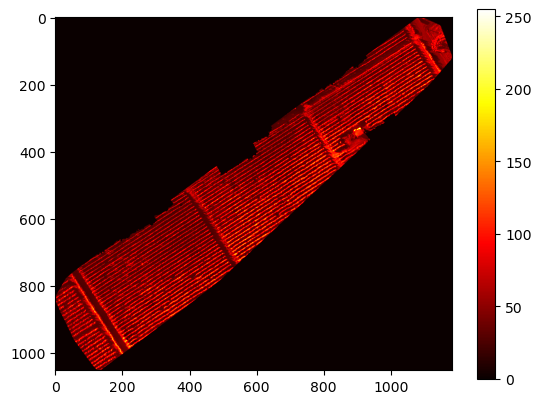

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Open the DSM GeoTIFF file
with rasterio.open('orthophoto.tif') as src:
    # Read the DSM data as a numpy array
    savi = src.read(5)
    print(src.meta)
    print(src.descriptions)

norm = Normalize(vmin=savi.min(), vmax=savi.max())
savi_data_norm = norm(savi) * 255

# Create a heatmap using the imshow function
plt.imshow(savi_data_norm , cmap='hot')

# Add a colorbar to the graph
plt.colorbar()

# Show the plot
plt.show()

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1182, 'height': 1057, 'count': 1, 'crs': CRS.from_epsg(32629), 'transform': Affine(0.2398700235580337, 0.0, 513398.4260612592,
       0.0, -0.2399260609982537, 4271985.5623542685)}
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1182, 'height': 1057, 'count': 4, 'crs': CRS.from_epsg(32629), 'transform': Affine(0.2398700235580337, 0.0, 513398.4260612592,
       0.0, -0.2399260609982537, 4271985.5623542685)}


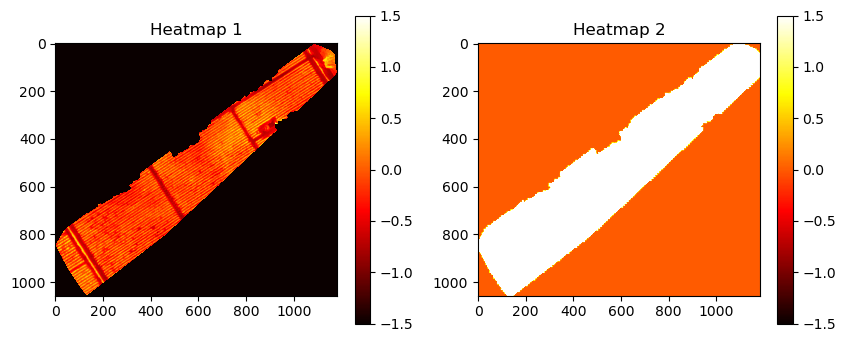

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Open the DSM GeoTIFF file
with rasterio.open('savi.tif') as src:
    # Read the DSM data as a numpy array
    savi = src.read(1)
    print(src.meta)

with rasterio.open('savi_rgb.tif') as src1:
    # Read the DSM data as a numpy array
    savirgb = src1.read(4)
    print(src1.meta)

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the first heatmap on the first subplot
heatmap1 = axs[0].imshow(savi, cmap='hot', vmin=-1.5, vmax=1.5)
axs[0].set_title('Heatmap 1')

# Plot the second heatmap on the second subplot
heatmap2 = axs[1].imshow(savirgb, cmap='hot', vmin=-1.5, vmax=1.5)
axs[1].set_title('Heatmap 2')

# Add a colorbar for each heatmap
fig.colorbar(heatmap1, ax=axs[0])
fig.colorbar(heatmap2, ax=axs[1])

# Show the plot
plt.show()

In [66]:
src = rasterio.open('savi_rgb.tif')
    # Read the DSM data as a numpy array
savi = src.read(5)
print(savi[600][600])

IndexError: band index 5 out of range (not in (1, 2, 3, 4))

In [51]:
savi.min()

-9999.0

In [50]:
savi.max()


1.4999117

In [16]:
height.all()

False

In [24]:
with rasterio.open('ORTHOPHOTO.tif') as src:

    # Get the data for the band you want to keep
    band_data = src.read(2)  # Replace "1" with the index of the band you want to keep

    # Create a new output file
    meta = src.meta.copy()
    meta.update(count=1, dtype=rasterio.float32)  # Set the number of bands and data type for the output file
    with rasterio.open('output.tif', 'w', **meta) as dst:

        # Write the data for the band you want to keep to the output file
        dst.write_band(1, band_data)  # Write the data to the first (and only) band of the output file
